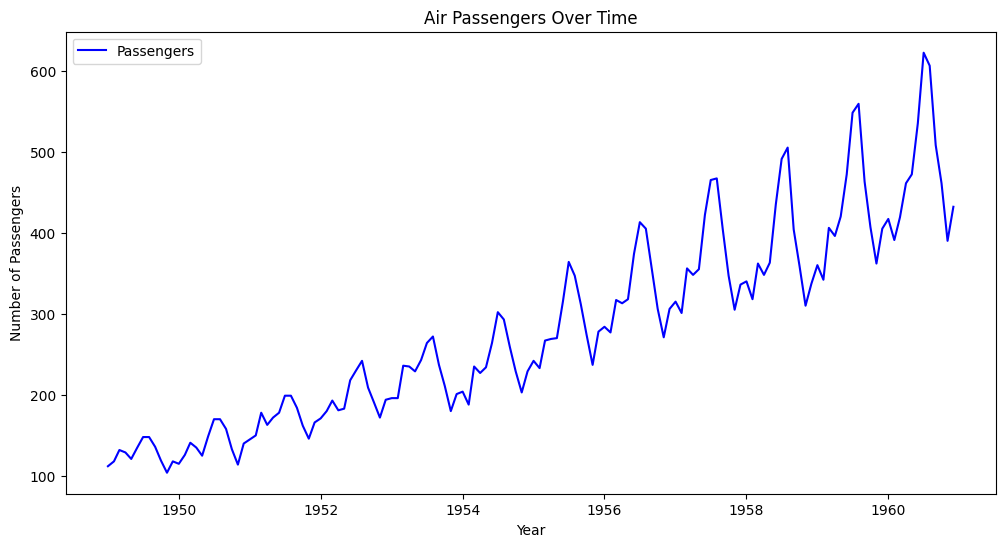

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
ADF Statistic (Differenced): -2.8292668241700047
p-value (Differenced): 0.05421329028382478


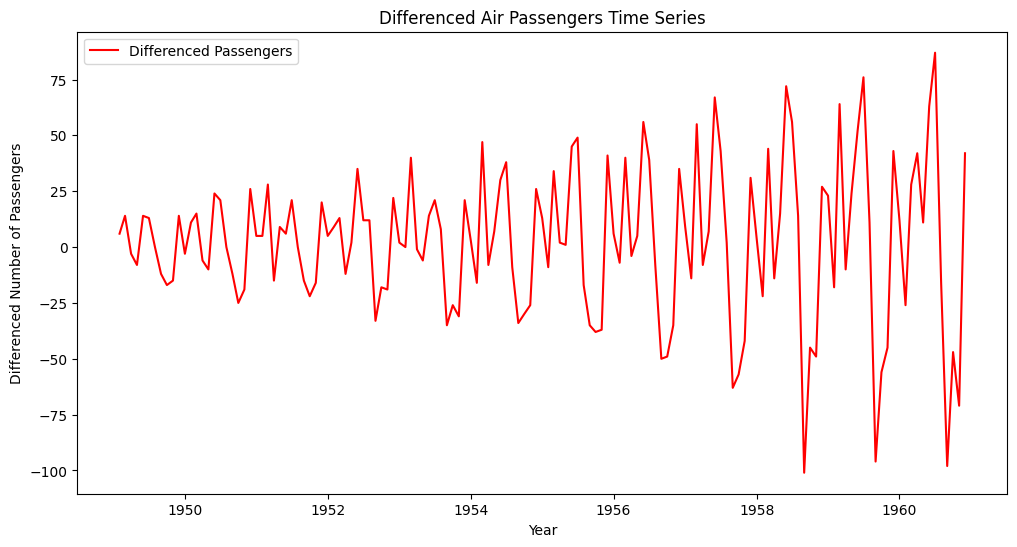

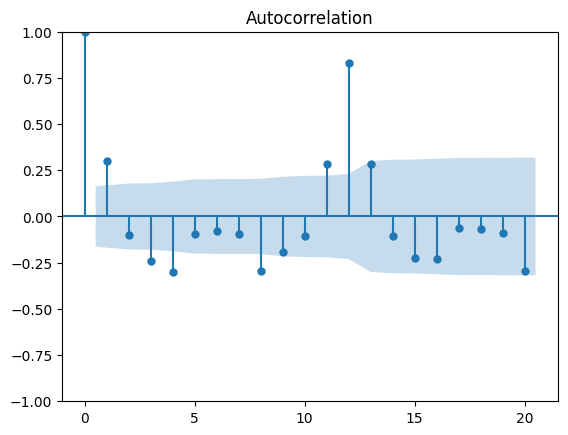

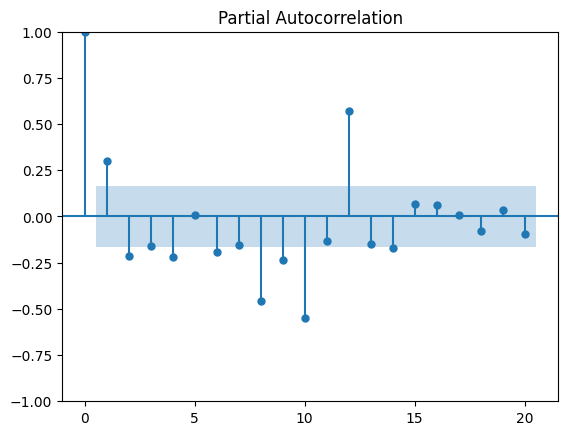

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-2-ade2931c8078>:72: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start=df.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast', color='red')


                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Tue, 01 Apr 2025   AIC                           1394.683
Time:                        03:44:18   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

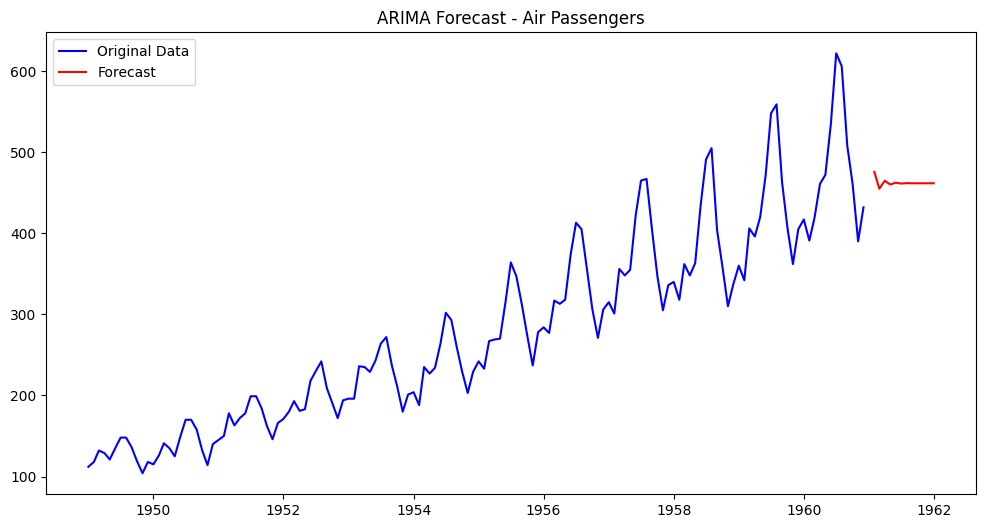

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Load the dataset
file_path = "AirPassengers.csv"  # Change path if necessary
df = pd.read_csv(file_path)

# Convert 'Month' column to datetime format and set as index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Rename column for easier access
df.columns = ['Passengers']

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(df, label="Passengers", color='blue')
plt.title("Air Passengers Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()

# Check for stationarity using the Augmented Dickey-Fuller test
adf_result = adfuller(df['Passengers'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

# Apply first-order differencing if necessary
df_diff = df.diff().dropna()

# Check stationarity again
adf_result_diff = adfuller(df_diff['Passengers'])
print(f"ADF Statistic (Differenced): {adf_result_diff[0]}")
print(f"p-value (Differenced): {adf_result_diff[1]}")

# Plot differenced data
plt.figure(figsize=(12, 6))
plt.plot(df_diff, label="Differenced Passengers", color='red')
plt.title("Differenced Air Passengers Time Series")
plt.xlabel("Year")
plt.ylabel("Differenced Number of Passengers")
plt.legend()
plt.show()

# Plot ACF and PACF to determine AR and MA terms
plot_acf(df_diff, lags=20)
plt.show()

plot_pacf(df_diff, lags=20)
plt.show()

# Fit the ARIMA model
model = ARIMA(df, order=(1, 1, 1))  # Adjust (p, d, q) based on ACF/PACF
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

# Forecast for the next 12 months
forecast = model_fit.forecast(steps=12)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(df, label='Original Data', color='blue')
plt.plot(pd.date_range(start=df.index[-1], periods=13, freq='M')[1:], forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast - Air Passengers')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-3-aa0289077dc0>:35: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='M')[1:]


            Forecasted_Passengers
Date                             
1961-01-31             475.735059
1961-02-28             454.996073
1961-03-31             464.830415
1961-04-30             460.167010
1961-05-31             462.378378
1961-06-30             461.329756
1961-07-31             461.827008
1961-08-31             461.591213
1961-09-30             461.703026
1961-10-31             461.650005
1961-11-30             461.675148
1961-12-31             461.663225


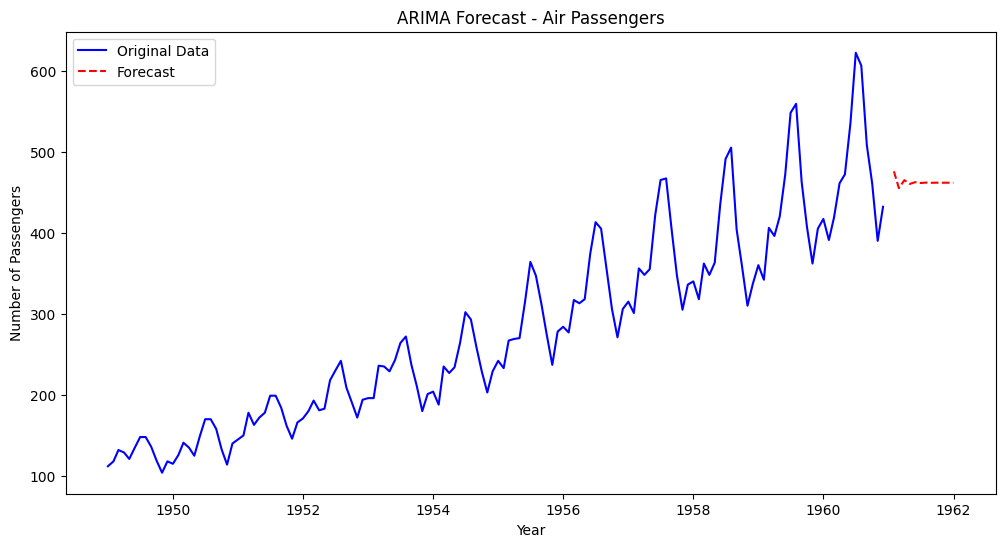

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Load the dataset
file_path = "AirPassengers.csv"  # Change the path if necessary
df = pd.read_csv(file_path)

# Convert 'Month' column to datetime format and set it as the index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Rename column for easier access
df.columns = ['Passengers']

# Check stationarity using the Augmented Dickey-Fuller test
adf_result = adfuller(df['Passengers'])
if adf_result[1] > 0.05:
    df_diff = df.diff().dropna()  # Apply first-order differencing

# Fit the ARIMA model (p, d, q) = (1, 1, 1)
model = ARIMA(df, order=(1, 1, 1))  # Adjust (p, d, q) based on ACF/PACF
model_fit = model.fit()

# Forecast for the next 12 months
forecast_steps = 12
forecast_values = model_fit.forecast(steps=forecast_steps)

# Generate future dates
future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Create a DataFrame with forecast values
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted_Passengers': forecast_values})
forecast_df.set_index('Date', inplace=True)

# Print forecasted values
print(forecast_df)

# Plot the original data and forecast
plt.figure(figsize=(12, 6))
plt.plot(df, label='Original Data', color='blue')
plt.plot(forecast_df, label='Forecast', color='red', linestyle='dashed')
plt.title('ARIMA Forecast - Air Passengers')
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()


ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -506.149
Date:                            Tue, 01 Apr 2025   AIC                           1022.299
Time:                                    03:46:32   BIC                           1036.675
Sample:                                01-01-1949   HQIC                          1028.140
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1272      0.356     -0.358      0.721      -0.825       0.570
ma.L1         -0.2148      0.325   

<ipython-input-4-5fcfa90322a3>:46: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='M')[1:]


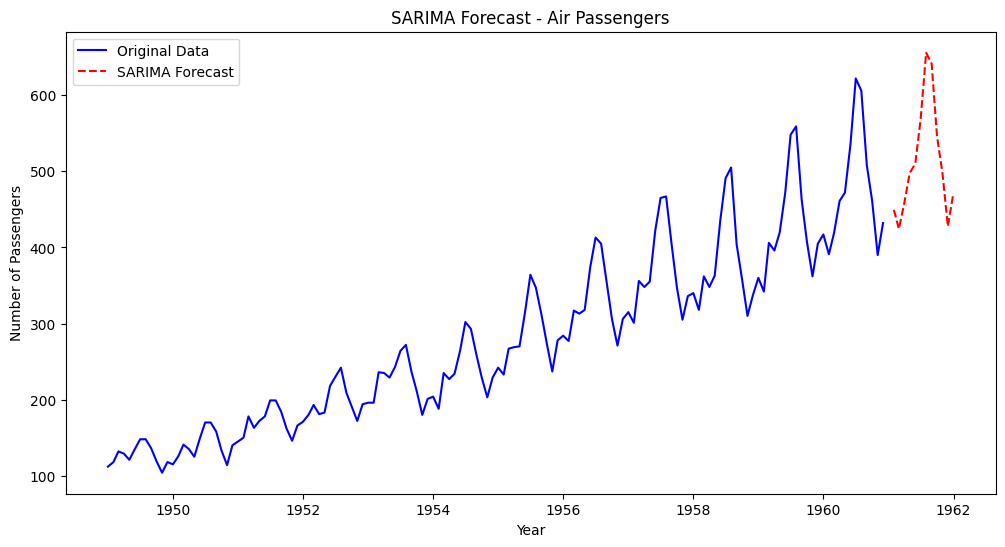

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# Load the dataset
file_path = "AirPassengers.csv"  # Change path if necessary
df = pd.read_csv(file_path)

# Convert 'Month' column to datetime format and set it as index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Rename column for easier access
df.columns = ['Passengers']

# Check for stationarity using the Augmented Dickey-Fuller test
adf_result = adfuller(df['Passengers'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

# If the series is non-stationary, apply first-order differencing
if adf_result[1] > 0.05:
    df_diff = df.diff().dropna()  # First differencing

# Define SARIMA Model (p, d, q) x (P, D, Q, s)
# Seasonal period (s) = 12 (since it's monthly data)
sarima_order = (1, 1, 1)  # ARIMA(p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, s)

# Fit SARIMA Model
sarima_model = SARIMAX(df, order=sarima_order, seasonal_order=seasonal_order)
sarima_fit = sarima_model.fit()

# Print model summary
print(sarima_fit.summary())

# Forecast for the next 12 months
forecast_steps = 12
forecast_values = sarima_fit.forecast(steps=forecast_steps)

# Generate future dates
future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Create a DataFrame with forecast values
forecast_df = pd.DataFrame({'Date': future_dates, 'Forecasted_Passengers': forecast_values})
forecast_df.set_index('Date', inplace=True)

# Print forecasted values
print(forecast_df)

# Plot the original data and SARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(df, label='Original Data', color='blue')
plt.plot(forecast_df, label='SARIMA Forecast', color='red', linestyle='dashed')
plt.title('SARIMA Forecast - Air Passengers')
plt.xlabel("Year")
plt.ylabel("Number of Passengers")
plt.legend()
plt.show()


ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_date

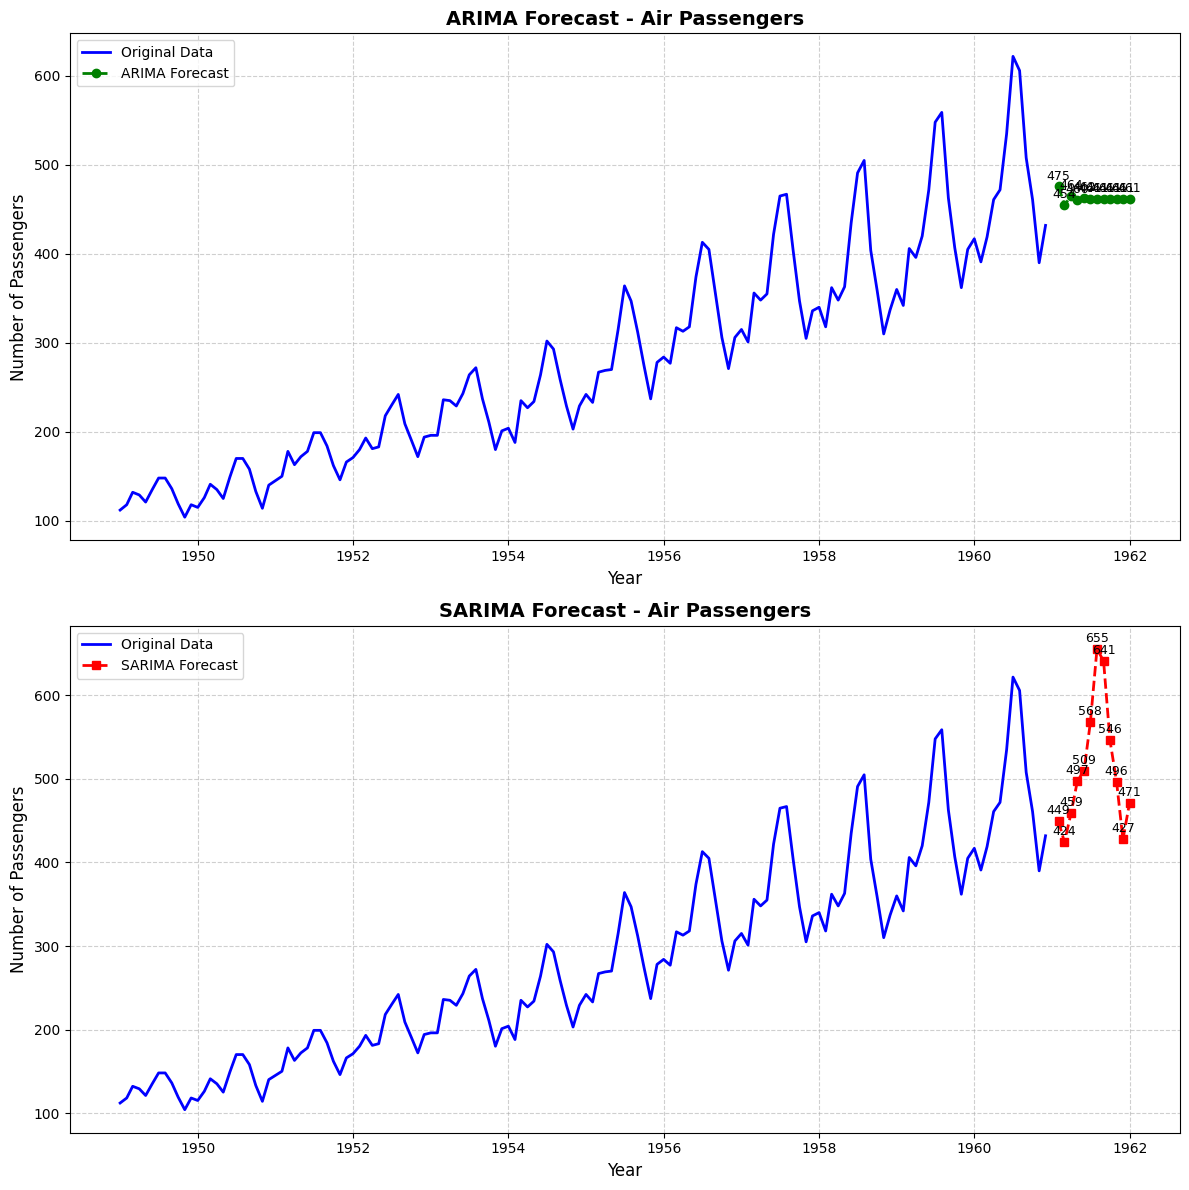

ARIMA Forecast:
            ARIMA_Forecast
Date                      
1961-01-31      475.735059
1961-02-28      454.996073
1961-03-31      464.830415
1961-04-30      460.167010
1961-05-31      462.378378
1961-06-30      461.329756
1961-07-31      461.827008
1961-08-31      461.591213
1961-09-30      461.703026
1961-10-31      461.650005
1961-11-30      461.675148
1961-12-31      461.663225

SARIMA Forecast:
            SARIMA_Forecast
Date                       
1961-01-31       449.331718
1961-02-28       424.388898
1961-03-31       459.039388
1961-04-30       497.868989
1961-05-31       509.867725
1961-06-30       568.261242
1961-07-31       655.813596
1961-08-31       641.195021
1961-09-30       546.398603
1961-10-31       496.805429
1961-11-30       427.680516
1961-12-31       471.243277


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# Load the dataset
file_path = "AirPassengers.csv"  # Update this path if needed
df = pd.read_csv(file_path)

# Convert 'Month' column to datetime format and set it as index
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

# Rename column for easier access
df.columns = ['Passengers']

# Check for stationarity using the Augmented Dickey-Fuller test
adf_result = adfuller(df['Passengers'])
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")

# Define ARIMA model (p, d, q) = (1, 1, 1)
arima_model = ARIMA(df, order=(1, 1, 1))
arima_fit = arima_model.fit()

# Define SARIMA model (p, d, q) x (P, D, Q, s)
sarima_model = SARIMAX(df, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Forecast for the next 12 months
forecast_steps = 12
arima_forecast = arima_fit.forecast(steps=forecast_steps)
sarima_forecast = sarima_fit.forecast(steps=forecast_steps)

# Generate future dates
future_dates = pd.date_range(start=df.index[-1], periods=forecast_steps + 1, freq='M')[1:]

# Create DataFrames for forecasts
arima_df = pd.DataFrame({'Date': future_dates, 'ARIMA_Forecast': arima_forecast})
sarima_df = pd.DataFrame({'Date': future_dates, 'SARIMA_Forecast': sarima_forecast})

# Set Date as index
arima_df.set_index('Date', inplace=True)
sarima_df.set_index('Date', inplace=True)

# Create a figure with two subplots (ARIMA & SARIMA)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 12))

# ==========================
# 📌 1st Plot - ARIMA Model
# ==========================
axes[0].plot(df, label='Original Data', color='blue', linewidth=2)
axes[0].plot(arima_df, label='ARIMA Forecast', color='green', linestyle='dashed', linewidth=2, marker='o')

# Annotate forecasted values
for i, txt in enumerate(arima_df['ARIMA_Forecast']):
    axes[0].annotate(f'{int(txt)}', (arima_df.index[i], txt), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color='black')

axes[0].set_title('ARIMA Forecast - Air Passengers', fontsize=14, fontweight='bold')
axes[0].set_xlabel("Year", fontsize=12)
axes[0].set_ylabel("Number of Passengers", fontsize=12)
axes[0].legend()
axes[0].grid(True, linestyle='--', alpha=0.6)

# ==========================
# 📌 2nd Plot - SARIMA Model
# ==========================
axes[1].plot(df, label='Original Data', color='blue', linewidth=2)
axes[1].plot(sarima_df, label='SARIMA Forecast', color='red', linestyle='dashed', linewidth=2, marker='s')

# Annotate forecasted values
for i, txt in enumerate(sarima_df['SARIMA_Forecast']):
    axes[1].annotate(f'{int(txt)}', (sarima_df.index[i], txt), textcoords="offset points", xytext=(0,5), ha='center', fontsize=9, color='black')

axes[1].set_title('SARIMA Forecast - Air Passengers', fontsize=14, fontweight='bold')
axes[1].set_xlabel("Year", fontsize=12)
axes[1].set_ylabel("Number of Passengers", fontsize=12)
axes[1].legend()
axes[1].grid(True, linestyle='--', alpha=0.6)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Print the forecast values
print("ARIMA Forecast:")
print(arima_df)
print("\nSARIMA Forecast:")
print(sarima_df)


In [9]:
import pandas as pd
file_path = "book_sales.csv"
df = pd.read_csv(file_path)
df.head()


,Date,Paperback,Hardcover
0,2000-04-01,199,139
1,2000-04-02,172,128
2,2000-04-03,111,172
3,2000-04-04,209,139
4,2000-04-05,161,191


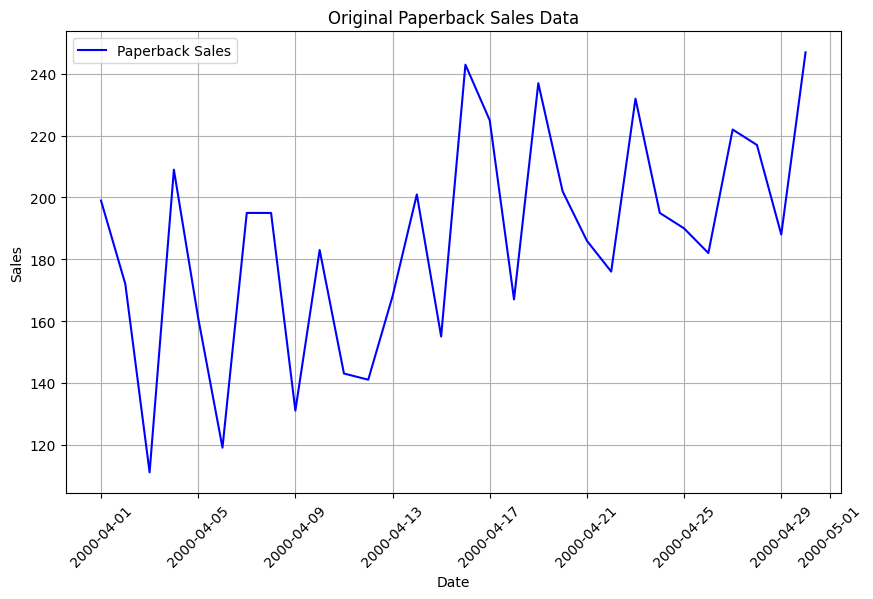

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the dataset
# Replace 'your_dataset.csv' with the actual file path
df = pd.read_csv('book_sales.csv')

# Step 2: Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Step 4: Plot the original data (e.g., 'Paperback' sales)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Paperback'], label='Paperback Sales', color='blue')
plt.title('Original Paperback Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                     
Dep. Variable:                         Paperback   No. Observations:                   30
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                 -63.113
Date:                           Tue, 01 Apr 2025   AIC                            136.227
Time:                                   04:04:51   BIC                            139.052
Sample:                               04-01-2000   HQIC                           135.646
                                    - 04-30-2000                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2618      0.469     -0.558      0.577      -1.181       0.657
ma.L1         -0.6745      0.473     -1.426

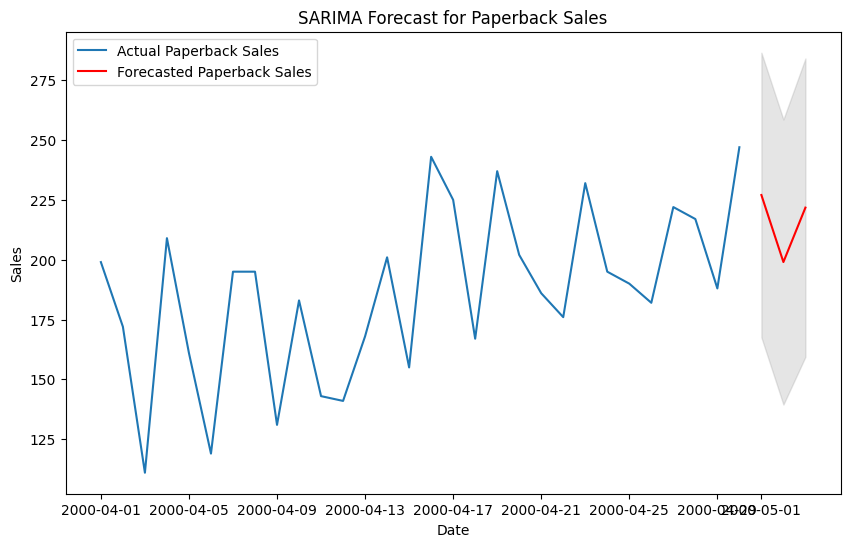

In-sample RMSE: 68.66125929552003


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse

# Step 1: Load the dataset
# Replace 'your_dataset.csv' with the actual file path
df = pd.read_csv('book_sales.csv')

# Step 2: Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Step 3: Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Step 4: Perform SARIMA for 'Paperback' sales (you can choose 'Hardcover' as well)
# Define SARIMA parameters (p, d, q) x (P, D, Q, S)
# Here, we assume (p=1, d=1, q=1) and seasonal (P=1, D=1, Q=1, S=7) as an example
sarima_model = SARIMAX(df['Paperback'],
                       order=(1, 1, 1),  # Non-seasonal parameters (p, d, q)
                       seasonal_order=(1, 1, 1, 7),  # Seasonal parameters (P, D, Q, S), assuming weekly seasonality (S=7)
                       enforce_stationarity=False,
                       enforce_invertibility=False)

# Step 5: Fit the SARIMA model
sarima_results = sarima_model.fit(disp=False)

# Step 6: Print the summary of the model
print(sarima_results.summary())

# Step 7: Make predictions (for the next 3 days as an example)
forecast = sarima_results.get_forecast(steps=3)
forecast_index = pd.date_range(df.index[-1], periods=4, freq='D')[1:]

# Step 8: Plot the actual vs. forecasted values
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Paperback'], label='Actual Paperback Sales')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecasted Paperback Sales', color='red')
plt.fill_between(forecast_index, forecast.conf_int().iloc[:, 0], forecast.conf_int().iloc[:, 1], color='gray', alpha=0.2)
plt.legend()
plt.title('SARIMA Forecast for Paperback Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Step 9: Evaluate the model (e.g., RMSE)
in_sample_rmse = rmse(df['Paperback'], sarima_results.fittedvalues)
print(f'In-sample RMSE: {in_sample_rmse}')
